# Import

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.tools import mpl_to_plotly as ggplotly
from plotnine import *
from speed_angle_handler import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Read In

In [2]:
complete = pd.read_csv('../data/nyra_2019_complete.csv', 
                       dtype={'program_number': str,
                              'track_condition': str,
                              'race_type':str,
                              'post_time':str}
                    )

# EDA

In [3]:
complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090


### How many lines per race? How many lines per horse per race?

Typically between 300 and 400.

In [4]:
lines_by_horse_and_race = (
        complete
                .groupby(['track_id', 
                        'race_date', 
                        'race_number']
                        )
                ['program_number']
                .value_counts()
                .sort_index()
                .rename('trakus_indices')
                .reset_index()
)

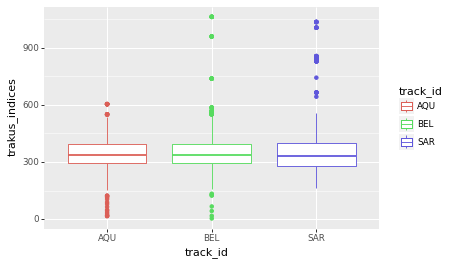

<ggplot: (137048173043)>

In [5]:
(
    ggplot(lines_by_horse_and_race,
           aes(x = 'track_id',
               color = 'track_id',
               y = 'trakus_indices'
            )
        )
    + geom_boxplot()
)

### How many horses per race?

Typically between 6 and 9.

In [6]:
horse_count_by_race = (
  complete
      .groupby(['track_id', 
                'race_date', 
                'race_number']
              )
      ['program_number']
      .nunique()
      .rename('count_of_horses')
      .reset_index()
)

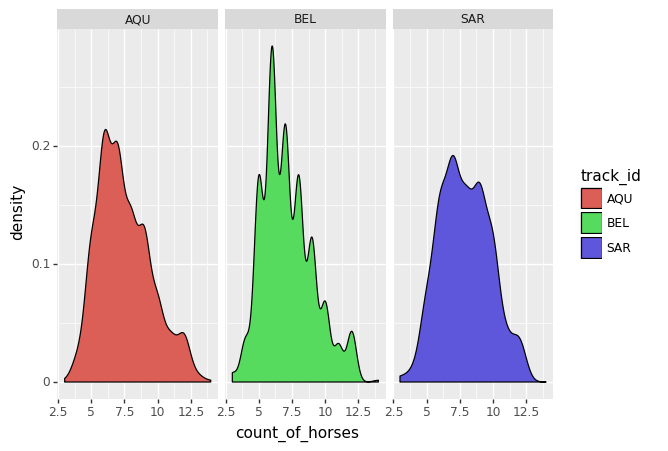

<ggplot: (137048687268)>

In [7]:
(
    ggplot(horse_count_by_race, aes(x = 'count_of_horses', 
                                    fill = 'track_id'
                                    )
        )
    + geom_density()
    + facet_wrap('~track_id')
)

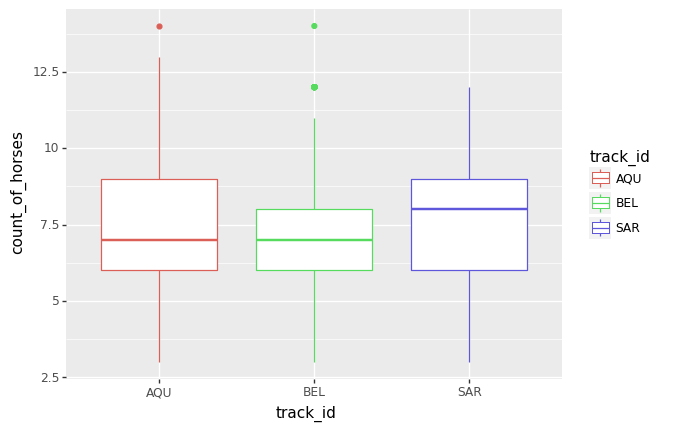

<ggplot: (137048854874)>

In [8]:
(
    ggplot(horse_count_by_race,
           aes(x = 'track_id',
               color = 'track_id',
               y = 'count_of_horses')
        )
    + geom_boxplot()
)

## Watch Race with iPyWidgets

In [9]:
complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090


In [11]:
complete['trakus_index'] = complete['trakus_index'].astype(int)

In [12]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_date        object 
 2   race_number      int64  
 3   program_number   object 
 4   trakus_index     int32  
 5   latitude         float64
 6   longitude        float64
 7   distance_id      int64  
 8   course_type      object 
 9   track_condition  object 
 10  run_up_distance  int64  
 11  race_type        object 
 12  purse            int64  
 13  post_time        object 
 14  weight_carried   int64  
 15  jockey           object 
 16  odds             int64  
 17  point            object 
dtypes: float64(2), int32(1), int64(6), object(9)
memory usage: 698.1+ MB


In [13]:
complete.loc[(complete['track_id'] == 'AQU') & (complete['race_date'] == '2019-01-01')]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,point
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090,POINT (40.6729017197787 -73.8276065972899)
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090,POINT (40.6729459870339 -73.82758726666948)
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090,POINT (40.6729903067774 -73.8275680245873)
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090,POINT (40.672509778989294 -73.8277810216018)
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090,POINT (40.672552699664 -73.82776155086438)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248381,AQU,2019-01-01,8,4,8,40.666998,-73.830280,800,D,GD,54,STK,150000,00350,120,Jorge A. Vargas Jr.,900,POINT (40.666997574341 -73.8302802649292)
4248382,AQU,2019-01-01,8,4,9,40.667026,-73.830267,800,D,GD,54,STK,150000,00350,120,Jorge A. Vargas Jr.,900,POINT (40.6670257820973 -73.8302673622969)
4248383,AQU,2019-01-01,8,4,10,40.667057,-73.830253,800,D,GD,54,STK,150000,00350,120,Jorge A. Vargas Jr.,900,POINT (40.6670565831501 -73.83025305539341)
4248384,AQU,2019-01-01,8,4,11,40.667089,-73.830238,800,D,GD,54,STK,150000,00350,120,Jorge A. Vargas Jr.,900,POINT (40.6670891092347 -73.8302378098981)


In [22]:
complete = (
    complete.loc[(~complete['longitude'].isin([np.nan, np.inf])) 
                 & 
                 (~complete['latitude'].isin([np.nan, np.inf]))
                ]
                 .sort_values(
                    ['track_id',
                      'race_date',
                      'race_number',
                      'trakus_index',
                      'program_number'
                    ])
    )
# @interact(
#     track_id = 'AQU',	
#     race_date = '2019-01-01',	
#     race_number = 9
# )
def view_race(track_id,
              race_date,
              race_number,
              trakus_index
            ):

    race = (
        complete.loc[
                (complete['track_id'] == track_id)
                &
                (complete['race_date'] == race_date)
                &
                (complete['race_number'] == race_number)
                ]
    )

    split = (
        complete.loc[
                (complete['track_id'] == track_id)
                &
                (complete['race_date'] == race_date)
                &
                (complete['race_number'] == race_number)
                &
                (complete['trakus_index'] == trakus_index)
                ]
    )

    min_longitude =  race['longitude'].min()-0.0005
    max_longitude = race['longitude'].max()+0.0005
    min_latitude = race['latitude'].min()-0.0005
    max_latitude = race['latitude'].max()+0.0005

    plot = (
        ggplot(split,
               aes(
                    x = 'longitude', 
                    y = 'latitude',
                    size='odds',
                    color='program_number'
                )
            )
            + geom_point()
            + xlim(min_longitude, max_longitude)
            + ylim(min_latitude, max_latitude)
    )

    # plot = px.scatter(split, 
    #         x = 'longitude', 
    #         y = 'latitude',
    #         size='odds',
    #         color='program_number',
    #         animation_frame='trakus_index',
    #         range_x = [min_longitude, max_longitude],
    #         range_y = [min_latitude, max_latitude]
    #         )

    return split

def choose_a_horse_race():
    track_selector = widgets.Dropdown(
        options=complete['track_id'].unique(),
        value='AQU',
        description='Track:',
        disabled=False,
    )

    date_selector = widgets.Dropdown(
        options = complete.loc[complete['track_id'] == track_selector.value, 'race_date'].unique(),
        value = '2019-01-01',
        description = 'Date:',
        disabled = False
    )

    race_number_selector = widgets.Dropdown(
        options = (complete.loc[(complete['track_id'] == track_selector.value) 
                                & 
                                (complete['race_date'] == date_selector.value), 
                                'race_number'
                            ]
                        .unique()
                ),
        value = 9,
        description = 'Race Number:',
        disabled = False
    )

    selected_race = (
        complete.loc[(complete['track_id'] == track_selector.value)
                     &
                     (complete['race_date'] == date_selector.value)
                     &
                     (complete['race_number'] == race_number_selector.value)
                    ]
    )

    trakus_player = widgets.Play(
        value = selected_race['trakus_index'].min(),
        min = selected_race['trakus_index'].min(),
        max = selected_race['trakus_index'].max(),
        step = 1
    )

    return interact(view_race, 
                    track_id = track_selector, 
                    race_date = date_selector, 
                    race_number = race_number_selector,
                    trakus_index = trakus_player
                    )

In [23]:
choose_a_horse_race()

interactive(children=(Dropdown(description='Track:', options=('AQU', 'BEL', 'SAR'), value='AQU'), Dropdown(des…

<function __main__.view_race(track_id, race_date, race_number, trakus_index)>

In [16]:
@interact(x = 1, y = 2)
def add_them(x, y):
    return x+y

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), IntSlider(value=2, description='y', …

In [20]:
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

## Create Simple Target: Performance vs. Expected

create complete_geo

EPSG:2260

geometry: (lon, lat)

In [25]:
complete['geometry'] = complete.apply(lambda row: Point(row['longitude'], row['latitude']), axis = 1)

c:\Users\jrior\anaconda3\envs\bigderby\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


In [26]:
complete_geo = gpd.GeoDataFrame(
    data = complete,
    geometry = 'geometry',
    crs = 'EPSG:2260'
)

In [33]:
complete_geo.to_file('../data/nyra_2019_complete_geo.geojson', driver='GeoJSON')